In [2]:
# all imports go at the top, even though python is a very open language
import numpy as np
import pandas as pd

In [2]:
print(dir(pd))
print(dir(pd.DataFrame))

['Categorical', 'CategoricalDtype', 'CategoricalIndex', 'DataFrame', 'DateOffset', 'DatetimeIndex', 'DatetimeTZDtype', 'ExcelFile', 'ExcelWriter', 'Float64Index', 'Grouper', 'HDFStore', 'Index', 'IndexSlice', 'Int16Dtype', 'Int32Dtype', 'Int64Dtype', 'Int64Index', 'Int8Dtype', 'Interval', 'IntervalDtype', 'IntervalIndex', 'MultiIndex', 'NaT', 'NamedAgg', 'Period', 'PeriodDtype', 'PeriodIndex', 'RangeIndex', 'Series', 'SparseArray', 'SparseDataFrame', 'SparseDtype', 'SparseSeries', 'Timedelta', 'TimedeltaIndex', 'Timestamp', 'UInt16Dtype', 'UInt32Dtype', 'UInt64Dtype', 'UInt64Index', 'UInt8Dtype', '__builtins__', '__cached__', '__doc__', '__docformat__', '__file__', '__getattr__', '__git_version__', '__loader__', '__name__', '__package__', '__path__', '__spec__', '__version__', '_config', '_hashtable', '_lib', '_libs', '_np_version_under1p14', '_np_version_under1p15', '_np_version_under1p16', '_np_version_under1p17', '_tslib', '_typing', '_version', 'api', 'array', 'arrays', 'bdate_rang

## Series

In [3]:
list("abcd")

['a', 'b', 'c', 'd']

In [4]:
# Normal series and series with custom index
s1 = pd.Series([1,2,3], dtype='int8')
s2 = pd.Series([1,2,3, np.nan], index=list("abcd"))
print(s1)
print()
print(s2)

0    1
1    2
2    3
dtype: int8

a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64


In [5]:
# changing dtype: astype
print(s1.astype('float64'))
print()
print(s1.astype('str'))
print(s1.astype('str').dtype)

0    1.0
1    2.0
2    3.0
dtype: float64

0    1
1    2
2    3
dtype: object
object


In [6]:
# shape, size, dtype, index, values
print(s1.shape)
print(s1.size)
print(s1.dtype)
print(s1.index)
print(s1.values, type(s1.values))

print()
print(s2.index)
print(s2.values)

(3,)
3
int8
RangeIndex(start=0, stop=3, step=1)
[1 2 3] <class 'numpy.ndarray'>

Index(['a', 'b', 'c', 'd'], dtype='object')
[ 1.  2.  3. nan]


In [7]:
# aggregate operations: min, max, unique, sum etc.
print(s1.min())
print(s1.max())
print(s1.unique())
print(s1.sum())
print(s1.all())
print(s1.any())

print()
print(s2.min())
print(s2.max())
print(s2.unique())
print(s2.sum())
print(s2.all())
print(s2.any())

1
3
[1 2 3]
6
True
True

1.0
3.0
[ 1.  2.  3. nan]
6.0
True
True


In [8]:
# arithmetic operations(new copy) and broadcast like numpy
print(s1 * 10) 
print()
print(s1 - (s1*10))

print()
print(s1 - s2)
s3 = pd.Series([1,2,3,4,5], dtype='int8')

print()
print(s3-s1)

0    10
1    20
2    30
dtype: int8

0    -9
1   -18
2   -27
dtype: int8

0   NaN
1   NaN
2   NaN
a   NaN
b   NaN
c   NaN
d   NaN
dtype: float64

0    0.0
1    0.0
2    0.0
3    NaN
4    NaN
dtype: float64


In [9]:
# indexing and slicing
print(s1[1])
print(s2['a'])

print()
print(s1[1:])
print()
print(s2['a':])


print()
print(s1[1:2])
print()
print(s2['a':'c'])

2
1.0

1    2
2    3
dtype: int8

a    1.0
b    2.0
c    3.0
d    NaN
dtype: float64

1    2
dtype: int8

a    1.0
b    2.0
c    3.0
dtype: float64


In [10]:
# result of operations as index
r = s1 % 2 == 0
print(r)

print()
print(s1[r])

print()
print(s1[ [0,1] ])

print()
s1[ [0,2] ] = 3
print(s1)

0    False
1     True
2    False
dtype: bool

1    2
dtype: int8

0    1
1    2
dtype: int8

0    3
1    2
2    3
dtype: int8


In [11]:
# frequency : value_counts
r = s1.value_counts()
print(r, r.index)

print()
s4 = pd.Series(list('abcccccccccabaa'))
print(s4.value_counts())

3    2
2    1
dtype: int64 Int64Index([3, 2], dtype='int64')

c    9
a    4
b    2
dtype: int64


## DataFrame

In [3]:
# dataframe from dict or list of rows
df1 = pd.DataFrame(
    {
        "Name":   ["Gaurav", "Abhishek1", "Krishna", "Abhishek2", "Harshita", "Joey", "Shweta", "na-1" , "na-2"  , np.nan],
        "Age":    [ 0      , 1          , 2        , 2          , 1         , 2     , 3       , 1      ,  np.nan , 2     ],
        "Gender": [ 0      , 0          , 0        , 0          , 1         , 1     , 1       , np.nan ,  0      , 0     ]
    }
)
df2 = pd.DataFrame([("Gaurav",1), ("Abhiskek",2), ("Krishna",3), ("Abhishek2",4)],
                    index=[0,11,2,3], 
                    columns=["Name", "Number"])
print(df1)
print()
print(df2)

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0

         Name  Number
0      Gaurav       1
11   Abhiskek       2
2     Krishna       3
3   Abhishek2       4


In [13]:
# shape, size, dtypes, index, columns, T
print(df1.shape)
print()
print(df1.size)
print()
print(df1.dtypes, type(df1.dtypes))
print()
print(df1.index)
print()
print(df1.columns)
print()
print(df1.T)

print()
print("Second one")
print(df2.shape)
print(df2.size)
print(df2.dtypes)
print(df2.index)
print(df2.columns)
print(df2.T)

(10, 3)

30

Name       object
Age       float64
Gender    float64
dtype: object <class 'pandas.core.series.Series'>

RangeIndex(start=0, stop=10, step=1)

Index(['Name', 'Age', 'Gender'], dtype='object')

             0          1        2          3         4     5       6     7  \
Name    Gaurav  Abhishek1  Krishna  Abhishek2  Harshita  Joey  Shweta  na-1   
Age          0          1        2          2         1     2       3     1   
Gender       0          0        0          0         1     1       1   NaN   

           8    9  
Name    na-2  NaN  
Age      NaN    2  
Gender     0    0  

Second one
(4, 2)
8
Name      object
Number     int64
dtype: object
Int64Index([0, 11, 2, 3], dtype='int64')
Index(['Name', 'Number'], dtype='object')
            0         11       2          3 
Name    Gaurav  Abhiskek  Krishna  Abhishek2
Number       1         2        3          4


In [14]:
# Rename index and columns on df2.
# Inplace vs normal operation
d = df1.rename(columns = {'Name':'Abc'})
print(df1)
print()
print(d)

print()
d1 = d.rename(columns = {'Age':'A'}, inplace=True)
print(d1)
print(d)

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0

         Abc  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0

None
         Abc    A  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0


In [15]:
print(df1.rename(index={5:50}))

print()
d.columns = ['N',"A","G"]
print(d)

print()
print(d.rename(lambda x: x.lower(), axis=1))

         Name  Age  Gender
0      Gaurav  0.0     0.0
1   Abhishek1  1.0     0.0
2     Krishna  2.0     0.0
3   Abhishek2  2.0     0.0
4    Harshita  1.0     1.0
50       Joey  2.0     1.0
6      Shweta  3.0     1.0
7        na-1  1.0     NaN
8        na-2  NaN     0.0
9         NaN  2.0     0.0

           N    A    G
0     Gaurav  0.0  0.0
1  Abhishek1  1.0  0.0
2    Krishna  2.0  0.0
3  Abhishek2  2.0  0.0
4   Harshita  1.0  1.0
5       Joey  2.0  1.0
6     Shweta  3.0  1.0
7       na-1  1.0  NaN
8       na-2  NaN  0.0
9        NaN  2.0  0.0

           n    a    g
0     Gaurav  0.0  0.0
1  Abhishek1  1.0  0.0
2    Krishna  2.0  0.0
3  Abhishek2  2.0  0.0
4   Harshita  1.0  1.0
5       Joey  2.0  1.0
6     Shweta  3.0  1.0
7       na-1  1.0  NaN
8       na-2  NaN  0.0
9        NaN  2.0  0.0


In [16]:
# Indexing columns directly and via index.
print(df1.Name) # only for valid non-numeric names
print(df1['Name'])

0       Gaurav
1    Abhishek1
2      Krishna
3    Abhishek2
4     Harshita
5         Joey
6       Shweta
7         na-1
8         na-2
9          NaN
Name: Name, dtype: object
0       Gaurav
1    Abhishek1
2      Krishna
3    Abhishek2
4     Harshita
5         Joey
6       Shweta
7         na-1
8         na-2
9          NaN
Name: Name, dtype: object


In [17]:
# Series in a DataFrame
print(type(df1.Name))
print()
print(df1.Age.unique())
print()
print(df1.Age.value_counts())

<class 'pandas.core.series.Series'>

[ 0.  1.  2.  3. nan]

2.0    4
1.0    3
3.0    1
0.0    1
Name: Age, dtype: int64


In [18]:
# describe, top/bottom rows of data
print(df1.describe(include='all'))

print()
print(df1.head())

print()
print(df1.head(3))

print()
print(df1.tail())

             Name       Age    Gender
count           9  9.000000  9.000000
unique          9       NaN       NaN
top     Abhishek1       NaN       NaN
freq            1       NaN       NaN
mean          NaN  1.555556  0.333333
std           NaN  0.881917  0.500000
min           NaN  0.000000  0.000000
25%           NaN  1.000000  0.000000
50%           NaN  2.000000  0.000000
75%           NaN  2.000000  1.000000
max           NaN  3.000000  1.000000

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0

     Name  Age  Gender
5    Joey  2.0     1.0
6  Shweta  3.0     1.0
7    na-1  1.0     NaN
8    na-2  NaN     0.0
9     NaN  2.0     0.0


In [19]:
# indexing and slicing
# loc, iloc [rows, cols]

In [20]:
# loc
print(df1.loc[0])
print()
print(df1.loc[:3])
print()
print(df1.loc[::2, 'Name'::2])
print()
print(df1.loc[1:3, 'Name':'Age'])

Name      Gaurav
Age            0
Gender         0
Name: 0, dtype: object

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0

       Name  Gender
0    Gaurav     0.0
2   Krishna     0.0
4  Harshita     1.0
6    Shweta     1.0
8      na-2     0.0

        Name  Age
1  Abhishek1  1.0
2    Krishna  2.0
3  Abhishek2  2.0


In [21]:
# iloc
print(df2)
print()
print(df2.iloc[1])
print()
print(df2.iloc[:,0])
print()
print(df2.iloc[:,1:])
print()
print(df2.iloc[:][1:]) # different

         Name  Number
0      Gaurav       1
11   Abhiskek       2
2     Krishna       3
3   Abhishek2       4

Name      Abhiskek
Number           2
Name: 11, dtype: object

0        Gaurav
11     Abhiskek
2       Krishna
3     Abhishek2
Name: Name, dtype: object

    Number
0        1
11       2
2        3
3        4

         Name  Number
11   Abhiskek       2
2     Krishna       3
3   Abhishek2       4


In [22]:
# aggregate operations (with and without axis : row-1, col-0)
# min, max, count, ...
print(df1.min())
print()
print(df1.min(axis=1))
print()
print(df1.count(axis=1))
print(df1.tail())

Age       0.0
Gender    0.0
dtype: float64

0    0.0
1    0.0
2    0.0
3    0.0
4    1.0
5    1.0
6    1.0
7    1.0
8    0.0
9    0.0
dtype: float64

0    3
1    3
2    3
3    3
4    3
5    3
6    3
7    2
8    2
9    2
dtype: int64
     Name  Age  Gender
5    Joey  2.0     1.0
6  Shweta  3.0     1.0
7    na-1  1.0     NaN
8    na-2  NaN     0.0
9     NaN  2.0     0.0


In [23]:
# arithmetic operations
print(df1*2)
# print(df1-2) # doesn't work since Name column is a string

                 Name  Age  Gender
0        GauravGaurav  0.0     0.0
1  Abhishek1Abhishek1  2.0     0.0
2      KrishnaKrishna  4.0     0.0
3  Abhishek2Abhishek2  4.0     0.0
4    HarshitaHarshita  2.0     2.0
5            JoeyJoey  4.0     2.0
6        ShwetaShweta  6.0     2.0
7            na-1na-1  2.0     NaN
8            na-2na-2  NaN     0.0
9                 NaN  4.0     0.0


In [24]:
# Na Values: isna, fillna, dropna
print(df1.isna().any())
print()
print(df1.isna().any(axis=1))
print()
print(df1.isna().sum())

Name      True
Age       True
Gender    True
dtype: bool

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7     True
8     True
9     True
dtype: bool

Name      1
Age       1
Gender    1
dtype: int64


In [25]:
# fillna
print(df1.tail())
print()
r = df1.fillna(method='ffill')#,inplace=True)
print(r.tail())

print()
r = df1.Name.fillna('-')
print(r)

print(df1)



     Name  Age  Gender
5    Joey  2.0     1.0
6  Shweta  3.0     1.0
7    na-1  1.0     NaN
8    na-2  NaN     0.0
9     NaN  2.0     0.0

     Name  Age  Gender
5    Joey  2.0     1.0
6  Shweta  3.0     1.0
7    na-1  1.0     1.0
8    na-2  1.0     0.0
9    na-2  2.0     0.0

0       Gaurav
1    Abhishek1
2      Krishna
3    Abhishek2
4     Harshita
5         Joey
6       Shweta
7         na-1
8         na-2
9            -
Name: Name, dtype: object
        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0


In [26]:
# dropna
r = df1.dropna()
print(r)
print()
r = df1.dropna(axis=1)
print(r)
print()
r = df1.dropna(axis=1, how = 'all')
print(r)

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0


In [27]:
# any, all

In [28]:
# ordering data, sort_values
print(df1.sort_values(by='Name'))
print()
print(df1.sort_values(by=['Age','Name'], ascending=[True, False]))

        Name  Age  Gender
1  Abhishek1  1.0     0.0
3  Abhishek2  2.0     0.0
0     Gaurav  0.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
2    Krishna  2.0     0.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0

        Name  Age  Gender
0     Gaurav  0.0     0.0
7       na-1  1.0     NaN
4   Harshita  1.0     1.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
5       Joey  2.0     1.0
3  Abhishek2  2.0     0.0
9        NaN  2.0     0.0
6     Shweta  3.0     1.0
8       na-2  NaN     0.0


In [29]:
# row / column wise operation: apply
tmp = pd.DataFrame(np.random.randint(10,20,20).reshape(5,4))

In [30]:
print(tmp)
print(tmp.apply(sum))
print()
print(tmp.apply(sum, axis=1))
print()
print(tmp.apply(lambda x : x**2, axis=1))

    0   1   2   3
0  11  19  11  19
1  14  11  18  15
2  18  16  13  17
3  14  13  12  19
4  17  11  16  15
0    74
1    70
2    70
3    85
dtype: int64

0    60
1    58
2    64
3    58
4    59
dtype: int64

     0    1    2    3
0  121  361  121  361
1  196  121  324  225
2  324  256  169  289
3  196  169  144  361
4  289  121  256  225


In [31]:
# str submodule (replace etc)
print(df1.Name.str.lower())
print(dir(df1.Name.str))

0       gaurav
1    abhishek1
2      krishna
3    abhishek2
4     harshita
5         joey
6       shweta
7         na-1
8         na-2
9          NaN
Name: Name, dtype: object
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__frozen', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_doc_args', '_freeze', '_get_series_list', '_inferred_dtype', '_is_categorical', '_make_accessor', '_orig', '_parent', '_validate', '_wrap_result', 'capitalize', 'casefold', 'cat', 'center', 'contains', 'count', 'decode', 'encode', 'endswith', 'extract', 'extractall', 'find', 'findall', 'get', 'get_dummies', 'index', 'isalnum', 'isalpha', 'isdecimal', 'isdigit', 'islower', 'isnumeric', 'isspace', 'istitle', 'isupper', 'join', 'len', 'l

In [32]:
# load and save data


In [36]:
print(df1)

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0


In [4]:
print()
print(df1.Age.sum())


14.0


In [78]:
# groups: groupby
grp  = df1.groupby(by=['Age'])
print(grp)
print(grp.groups)

print(grp.Age.sum())

print()
print(grp.Age.count())

print()
print(df1.Age.sum())

print("")
print(grp.Gender.max())

print()
print(df1.Gender.max())

{0.0: Int64Index([0], dtype='int64'), 1.0: Int64Index([1, 4, 7], dtype='int64'), 2.0: Int64Index([2, 3, 5, 9], dtype='int64'), 3.0: Int64Index([6], dtype='int64')}
Age
0.0    0.0
1.0    3.0
2.0    8.0
3.0    3.0
Name: Age, dtype: float64

Age
0.0    1
1.0    3
2.0    4
3.0    1
Name: Age, dtype: int64

14.0

Age
0.0    0.0
1.0    1.0
2.0    1.0
3.0    1.0
Name: Gender, dtype: float64

1.0


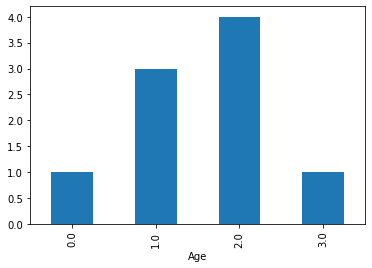

Age
0.0    1
1.0    3
2.0    4
3.0    1
Name: Age, dtype: int64


In [83]:
from matplotlib import pyplot as plt
res= grp.Age.count()
res.plot(kind='bar')
plt.show()
print(res)

In [62]:
for key in grp.groups:
    print()
    print(key)
    print(grp.g up(key))


0.0
     Name  Age  Gender
0  Gaurav  0.0     0.0

1.0
        Name  Age  Gender
1  Abhishek1  1.0     0.0
4   Harshita  1.0     1.0
7       na-1  1.0     NaN

2.0
        Name  Age  Gender
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
5       Joey  2.0     1.0
9        NaN  2.0     0.0

3.0
     Name  Age  Gender
6  Shweta  3.0     1.0


In [77]:
print(df1)

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0


In [5]:
grp = df1.groupby(by=['Age'])

In [7]:
#grp is a group object; grp.groups is a full list of all the groups 
#grp.groups is hashable and behaves like a dictionary 
for i in grp.groups.values():
    print(i)
    print(df1.loc[i])

Int64Index([0], dtype='int64')
     Name  Age  Gender
0  Gaurav  0.0     0.0
Int64Index([1, 4, 7], dtype='int64')
        Name  Age  Gender
1  Abhishek1  1.0     0.0
4   Harshita  1.0     1.0
7       na-1  1.0     NaN
Int64Index([2, 3, 5, 9], dtype='int64')
        Name  Age  Gender
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
5       Joey  2.0     1.0
9        NaN  2.0     0.0
Int64Index([6], dtype='int64')
     Name  Age  Gender
6  Shweta  3.0     1.0


In [10]:
for key, value in grp.groups.items():
    print(key)
    print(value)

0.0
Int64Index([0], dtype='int64')
1.0
Int64Index([1, 4, 7], dtype='int64')
2.0
Int64Index([2, 3, 5, 9], dtype='int64')
3.0
Int64Index([6], dtype='int64')


In [11]:
grp = df1.groupby(by=['Age','Gender'])
print(grp)
print(grp.groups)
print()
print(dir(grp))

{(0.0, 0.0): Int64Index([0], dtype='int64'), (1.0, 0.0): Int64Index([1], dtype='int64'), (1.0, 1.0): Int64Index([4], dtype='int64'), (1.0, nan): Int64Index([7], dtype='int64'), (2.0, 0.0): Int64Index([2, 3, 9], dtype='int64'), (2.0, 1.0): Int64Index([5], dtype='int64'), (3.0, 1.0): Int64Index([6], dtype='int64'), (nan, 0.0): Int64Index([8], dtype='int64')}

['Age', 'Gender', 'Name', '__annotations__', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattr__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_accessors', '_add_numeric_operations', '_agg_examples_doc', '_agg_see_also_doc', '_aggregate', '_aggregate_frame', '_aggregate_item_by_item', '_aggregate_multiple_funcs', '_apply_filter', '_apply_

In [48]:
# groups and aggregates
print(grp.groups)
print(grp)
print(grp.Gender.max())

{(0.0, 0.0): Int64Index([0], dtype='int64'), (1.0, 0.0): Int64Index([1], dtype='int64'), (1.0, 1.0): Int64Index([4], dtype='int64'), (1.0, nan): Int64Index([7], dtype='int64'), (2.0, 0.0): Int64Index([2, 3, 9], dtype='int64'), (2.0, 1.0): Int64Index([5], dtype='int64'), (3.0, 1.0): Int64Index([6], dtype='int64'), (nan, 0.0): Int64Index([8], dtype='int64')}
Age  Gender
0.0  0.0       0.0
1.0  0.0       0.0
     1.0       1.0
2.0  0.0       0.0
     1.0       1.0
3.0  1.0       1.0
Name: Gender, dtype: float64


In [56]:
for g in grp.groups:
    print(g)

(0.0, 0.0)
(1.0, 0.0)
(1.0, 1.0)
(1.0, nan)
(2.0, 0.0)
(2.0, 1.0)
(3.0, 1.0)
(nan, 0.0)


In [63]:
print(dir(grp.groups))

['__class__', '__contains__', '__delattr__', '__delitem__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setitem__', '__sizeof__', '__str__', '__subclasshook__', 'clear', 'copy', 'fromkeys', 'get', 'items', 'keys', 'pop', 'popitem', 'setdefault', 'update', 'values']


In [12]:
for i in grp.groups.values():
    print()
    print(i)
    print(df1.loc[i])


Int64Index([0], dtype='int64')
     Name  Age  Gender
0  Gaurav  0.0     0.0

Int64Index([1], dtype='int64')
        Name  Age  Gender
1  Abhishek1  1.0     0.0

Int64Index([4], dtype='int64')
       Name  Age  Gender
4  Harshita  1.0     1.0

Int64Index([7], dtype='int64')
   Name  Age  Gender
7  na-1  1.0     NaN

Int64Index([2, 3, 9], dtype='int64')
        Name  Age  Gender
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
9        NaN  2.0     0.0

Int64Index([5], dtype='int64')
   Name  Age  Gender
5  Joey  2.0     1.0

Int64Index([6], dtype='int64')
     Name  Age  Gender
6  Shweta  3.0     1.0

Int64Index([8], dtype='int64')
   Name  Age  Gender
8  na-2  NaN     0.0


In [87]:
print(df1)
df1.replace
df1.Name.str.replace

        Name  Age  Gender
0     Gaurav  0.0     0.0
1  Abhishek1  1.0     0.0
2    Krishna  2.0     0.0
3  Abhishek2  2.0     0.0
4   Harshita  1.0     1.0
5       Joey  2.0     1.0
6     Shweta  3.0     1.0
7       na-1  1.0     NaN
8       na-2  NaN     0.0
9        NaN  2.0     0.0


<bound method StringMethods.replace of <pandas.core.strings.StringMethods object at 0x000001AE4B521908>>

In [88]:
print(df1.Name.str.replace("a","A"))

0       GAurAv
1    Abhishek1
2      KrishnA
3    Abhishek2
4     HArshitA
5         Joey
6       ShwetA
7         nA-1
8         nA-2
9          NaN
Name: Name, dtype: object


In [90]:
print(df1.replace( {2.0: 20.0, 1.0:10.0}  ))

        Name   Age  Gender
0     Gaurav   0.0     0.0
1  Abhishek1  10.0     0.0
2    Krishna  20.0     0.0
3  Abhishek2  20.0     0.0
4   Harshita  10.0    10.0
5       Joey  20.0    10.0
6     Shweta   3.0    10.0
7       na-1  10.0     NaN
8       na-2   NaN     0.0
9        NaN  20.0     0.0


In [92]:
print(df1.Age.replace( {2.0: 20.0, 1.0:10.0}  ))

0     0.0
1    10.0
2    20.0
3    20.0
4    10.0
5    20.0
6     3.0
7    10.0
8     NaN
9    20.0
Name: Age, dtype: float64


In [96]:
df1.Name.replace(r"\d"  ,"",regex=True)

0      Gaurav
1    Abhishek
2     Krishna
3    Abhishek
4    Harshita
5        Joey
6      Shweta
7         na-
8         na-
9         NaN
Name: Name, dtype: object

In [94]:
df1.replace(1.0,10.0)

,Name,Age,Gender
0,Gaurav,0.0,0.0
1,Abhishek1,10.0,0.0
2,Krishna,2.0,0.0
3,Abhishek2,2.0,0.0
4,Harshita,10.0,10.0
5,Joey,2.0,10.0
6,Shweta,3.0,10.0
7,na-1,10.0,NaN
8,na-2,NaN,0.0
9,NaN,2.0,0.0
